In [52]:
import numpy as np

# ReLU Layer

In [53]:
class ReLU:

    def __init__(self):
        # mask -> 순전파 때 음수 였던 위치를 마스킹.
        #         역전파 때 음수 였떤 부분을 0으로 내보낼 수 있도록 할 예정
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0) # [1, -1, 3, -2] -> [ F, T, F, T ]
        out = x.copy() # copy를 하지 않으면 원래 입력된 데이터 자체가 변경

        out[self.mask] = 0 # 음수인 부분을 0으로 만들어 준다.
        return out

    def backward(self, dout):
        '''
            dout : 뒤에서 부터 전달된 미분값이 들어있는 배열이 들어온다.
        '''
        dout[self.mask] = 0 # 예를 들어 순전파 때 [+, -, +] 들어왔으면
                            # 역전파 수행 시에 - 였던 부분을 0으로 만들어 준다.

        dx = dout
        return dx

# 코드 설명:

# 이 코드는 ReLU (Rectified Linear Unit) 활성화 함수의 순전파 및 역전파를 구현한 클래스임. 
# ReLU는 입력이 양수일 때는 그대로 통과시키고, 음수일 때는 0으로 만드는 함수임.

    # 1. __init__(self)
# 설명: 
# 클래스가 초기화될 때 음수 값을 추적하기 위한 mask 변수를 설정함.
# 변수: 
# self.mask: 순전파에서 음수였던 값들의 위치를 저장하는 역할을 함. 이는 역전파 과정에서 음수였던 부분의 미분 값을 0으로 처리하기 위해 사용됨.

    # 2. forward(self, x)
# 설명: 
# ReLU의 순전파 과정임. 입력 x에서 음수인 부분을 0으로 변환하고 그 위치를 self.mask에 기록함.
# 코드 세부 설명:
    # self.mask = (x <= 0):
    # 입력 배열 x에서 0 이하인 값이 있는 위치를 True, 그 외에는 False로 저장함.
    # 예를 들어, x = [1, -1, 3, -2]이면 self.mask는 [False, True, False, True]가 됨.
    # out = x.copy(): 
    # 입력 배열 x의 복사본을 생성함. 복사하지 않으면 원본 데이터 자체가 변경되므로 이를 방지하기 위해 copy()를 사용함.
    # out[self.mask] = 0: 
    # self.mask에서 True로 표시된 위치(음수인 부분)를 찾아 해당 위치의 값을 0으로 바꿈.
    # 결과: 
    # 음수 값이 0으로 변환된 배열을 반환함.

    # 3. backward(self, dout)
# 설명: 
# ReLU의 역전파 과정임. 역전파 시 전달된 기울기 dout을 받아, 순전파에서 음수였던 부분의 미분 값을 0으로 만듦.
# 코드 세부 설명:
    # dout[self.mask] = 0: 
    # 순전파에서 음수였던 위치의 기울기를 0으로 만듦. 
    # 예를 들어, 순전파에서 x = [1, -1, 3, -2]이 들어왔으면, self.mask는 음수 위치를 기억하고 있으므로 해당 위치의 dout 값을 0으로 설정함.
    # dx = dout: 
    # 수정된 dout을 dx에 저장함.
    # 결과: 
    # 미분 값 dx를 반환함.

# ReLU의 순전파 및 역전파 요약:

    # 순전파 (forward):
# 입력 배열에서 음수인 값을 0으로 변환함.
# 음수였던 값들의 위치를 mask에 기록하여 기억함.
    
    # 역전파 (backward):
# 순전파에서 음수였던 위치의 미분 값은 0으로 설정하여 그 값이 역전파에서 전파되지 않도록 함.
# 양수였던 값들은 그대로 역전파됨.

# 동작 예시:
    
    # 순전파 예시:
# 입력 x = [1, -1, 3, -2]
# self.mask = [False, True, False, True]
# 출력 out = [1, 0, 3, 0]

    # 역전파 예시:
# dout = [0.5, -0.5, 1.0, -1.0] (역전파로 전달된 기울기)
# dout[self.mask] = 0: dout은 [0.5, 0, 1.0, 0]으로 변경됨
# 최종 dx = [0.5, 0, 1.0, 0]

In [54]:
x = np.array([[1.0, -0.5],
            [-2.0, 3.0]])

relu = ReLU()
relu.forward(x)


array([[1., 0.],
       [0., 3.]])

In [55]:
dout = np.array([[-1.0, 0.5],
                [-2.0, 3.0]])

relu.backward(dout)

array([[-1.,  0.],
       [ 0.,  3.]])

# $\sigma$(시그모이드) 구현
$$
\sigma(x) = \frac{\mathrm{1} }{\mathrm{1} + exp(-x)}
$$

$$
y = \sigma(x)
$$

$$
y' = \sigma(x)(1-\sigma(x))
$$

$$
y' = y(1-y)
$$

* 시그모이드 레이어에서 순전파 때 기억하고 있어야 할 값 : $y$값만 알고 있으면 된다.

In [56]:
class Sigmoid:

    def __init__(self):
        # 순전파 때 구한 y를 역전파(도함수) 수행시에 y(1-y)를 계산
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * self.out * (1 - self.out) # dout * y(1-y)
        return dx

# 코드 설명:
# 이 코드는 Sigmoid 활성화 함수의 순전파 및 역전파를 구현한 클래스임. Sigmoid 함수는 입력 값을 0과 1 사이의 값으로 변환하며, 그 도함수는 y(1-y)임.

    # 1. __init__(self)
# 설명: 
# 클래스가 초기화될 때, 순전파에서 구한 Sigmoid 출력값을 저장하는 변수 self.out을 설정함.
# 변수:
# self.out: 순전파에서 계산된 Sigmoid 함수의 출력값을 저장하여, 역전파에서 사용됨.

    # 2. forward(self, x)
# 설명: 
# Sigmoid 함수의 순전파 과정임. 입력 x에 대해 Sigmoid 함수를 적용하고 그 결과를 반환하며, self.out에 저장함.
# 코드 세부 설명:
    # out = 1 / (1 + np.exp(-x)): 입력 값 x를 Sigmoid 함수로 변환하는 공식인 1 / (1 + exp(-x))을 사용함.
    # self.out = out: 계산된 출력값을 self.out에 저장하여, 역전파에서 활용함.
    # 결과: Sigmoid 함수가 적용된 값을 반환함.

    # 3. backward(self, dout)
# 설명: 
# Sigmoid 함수의 역전파 과정임. dout은 역전파로 전달된 기울기이며, 이 값에 순전파에서 계산된 self.out을 사용하여 기울기를 계산함.
# 코드 세부 설명:
    # dx = dout * self.out * (1 - self.out): 
    # Sigmoid 함수의 도함수는 y * (1 - y)로 계산됨. 여기서 y는 순전파에서 구한 self.out에 해당함. 
    # 전달받은 기울기 dout에 self.out * (1 - self.out)을 곱하여 최종 기울기 dx를 계산함.
    # 결과: 최종적으로 계산된 미분 값 dx를 반환함.
    
# Sigmoid의 순전파 및 역전파 요약:

    # 순전파 (forward):
# 입력 값에 Sigmoid 함수를 적용하여 출력함.
# 순전파에서 계산된 결과는 역전파에서 활용하기 위해 self.out에 저장함.

    # 역전파 (backward):
# 전달된 기울기에 Sigmoid 함수의 도함수인 y * (1 - y)를 곱하여 최종 기울기를 계산함.
# y는 순전파에서 구한 출력값인 self.out에 해당함.

# 동작 예시:
    # 순전파 예시:
# 입력 x = [1, -1, 3, -2]
# 출력 out = Sigmoid(x) 결과를 반환

    # 역전파 예시:
# dout = [0.5, -0.5, 1.0, -1.0] (역전파로 전달된 기울기)
# 최종 dx = dout * self.out * (1 - self.out)

# Linear(Dense, FCL) 계층
* `forward`
  1. 입력값 `x`와 가중치 `W`의 내적 + `b` (`WX+b`)
  2. 평탄화
    * 1차원 배열로 데이터가 들어왔을 때 대응
    * 다차원 배열( 텐서 )에 대한 대응
    * **원본 데이터의 형상을 저장**
* `backward`
  1. 미분값(`dout`)과 가중치의 전치행렬(`W.T`) 내적 ( 입력값에 대한 미분값 )
  2. 입력값의 전치행렬(`X.T`)과 미분값(`dout`) 내적 ( 가중치에 대한 미분값 )
  3. 배치를 축으로 편향 합 구하기 (`axis=0`)
  4. 입력값의 미분값(`dx`)의 형상을 원본 `x`의 형상으로 다시 바꿔주기

`forward`에 의해서 형상(shape) 변환이 일어나기 때문에 `backward`할 때 원본 모양으로 되돌려 준다.
* `(100, 28, 28)`이 입력으로 들어오면, `forward`에서 평탄화에 의해 `(100, 784)`가 된다.
* 텐서에도 모두 내적을 수행할 수 있도록 원본 형상인 `(100, 28, 28)`저장을 해 놨다가 `backward`할 때 저장했던 원본 모양으로 **미분값 배열**의 형상을 되돌려 준다.

**저장해야 할 값**
1. 원본 `x`의 형상(shape)
2. 원본 `x` 데이터
3. 가중치, 편향
4. `dW`, `db`
  * 미분값을 알고 있어야 나중에 최적화( Optimization )를 할 수 있다.

In [57]:
class Linear:
    def __init__(self, W, b):
        # 1. 가중치, 편향
        self.W = W
        self.b = b

        self.x = None

        # 2. [쓰잘데기 없는거] x의 shape 저장
        self.original_x_shape = None

        # 3. W와 b의 기울기 배열 저장
        #    최적화(Optimization)를 위해 각 매개변수의 미분값이 필요하기 때문
        #    추후 경사하강법 구현 시에 사용됨.
        self.dW = None
        self.db = None

    def forward(self, x):
        # [쓰잘데기 없는거]텐서 대응을 위해 입력 값 x의 shape을 저장
        #    ex) x가 (3, 2, 2) -> 3개의 데이터가 (2, 2)의 모양으로 들어옴
        # 근데 이거를 선형연산 할거면(XW) (3, 2*2)형식으로 평탄화를 해야 함
        # 그래서 미분값이 (3, 4)의 형태로 들어온다.

        # 역전파 수행 시에 가중치 방향으로 곱하기 위해 저장    # 따라서 마지막에 x쪽으로 미분값 전달 시에는 다시 (3, 2, 2)형식으로 바꿔야 함
        self.original_x_shape = x.shape

        # 평탄화 수행
        DATA_SIZE = x.shape[0] # 배치 사이즈 가져오기
        x = x.reshape(DATA_SIZE, -1)

        self.x = x

        out = self.x @ self.W + self.b # (N, M) @ (M, K) + (K, )
                                        #   ==> (N, K)
        return out

    def backward(self, dout): # dout의 shape -> (N, K)
        # 입력값에 내보내는 미분값 계산
        dx = dout @ self.W.T # 델타 @ 가중치 # (N, K) @ (K, M) -> (N, M)

        self.dW = self.x.T @ dout # (M, N) @ (N, K) -> (M, K)
        self.db = np.sum(dout, axis=0) # (N, K) -> (K, )

        return dx

# SoftmaxWithLoss 계층(출력층)
* softmax에 의한 분류 및 CEE를 활용한 손실함수를 동시에 구현
* `forward`
  * 순전파 시에는 softmax를 적용하고, loss를 적용
    * 정답 레이블(`t`)
    * 예측값( 소프트맥스 결과물 )
    * loss값 ( 기록용 )
* `backward`
  * 순수한 오차 (`y-t`)를 구해서 이전층에 전달
  * 주의사항 : t가 OHE가 되어있는지, 안 되어있는지에 따라서 코드가 달라짐xal

In [58]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

In [59]:
class SoftmaxWithLoss:

    def __init__(self):
        self.loss = None # 손실값 (시각화 할 때 사용할 예정..)
        self.y    = None # 예측값 ( 역전파 때 사용 )
        self.t    = None # 정답 레이블 ( 역전파 때 사용 )

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1): # dout이 1인 이유 : d돈통 / d포스기 개념
        # 배치 고려하기
        batch_size = self.t.shape[0]

        # t가 원-핫 인코딩이 되어있는지, 안되어 있는지 고려
        if self.t.size == self.y.size: # 출력층의 원소 개수를 비교하는 것은 원-핫 인코딩이 되어있는 t
            # 항상 y는 softmax의 결과물 (N, OUTPUT_SIZE)
            # t가 OHE가 되어 있으면 (N, OUTPUT_SIZE)
            # t가 OHE가 안되어 있으면 (N, )
            dx = (self.y - self.t) / batch_size
        else: # t가 OHE가 안되어 있는 경우
            dx = self.y.copy()

            # 원-핫 인코딩이 되어있지 않은 t는 정답 레이블의 인덱스로 생각할 수 있다.
            # y = [0.2, 0.1, 0.7], t = 2
            # dx[np.arange(batch_size), self.t] -> dx[0, 2] -> 0.7 -> 0.7 - 1 를 구하겠다는 이야기 이다. -> -0.3의 오차가 있다.
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size

        return dx

# 신경망 모델 구축

In [60]:
# OrderedDict : 순서가 있는 딕셔너리
from collections import OrderedDict

# 2층 신경망 구현
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 매개변수(W, b) 초기화 (모델 파라미터 -> 미분이 가능해야 한다.)
        self.params = {}

        # 1층 은닉층을 위한 파라미터
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)

        # 2층 출력층을 위한 매개변수
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

        # 레이어 정의
        #  추가되는 레이어의 순서가 바뀌면 안되기 때문에 OrderedDict를 사용
        self.layers = OrderedDict()

        self.layers['linear_1'] = Linear(self.params["W1"], self.params["b1"])

        self.layers["relu"] = ReLU()

        self.layers["linear_2"] = Linear(self.params["W2"], self.params["b2"])

        # 항상 제일 마지막 층은 SoftmaxWithLoss
        self.last_layer = SoftmaxWithLoss()


    def predict(self, x):
        # 순전파가 실행된다.
        #  각 레이어의 forward 함수를 순서대로 실행
        for layer in self.layers.values(): # 레이어만 순서대로 뽑아오기
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t):
        # 예측을 하고, 정답이랑 얼마나 틀렸는지를 계산
        # 단, t가 원-핫 인코딩이 되어있는지, 안되어있는지가 중요!
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 제일 큰 값 하나만 뽑자.( 제일 확률이 높은 곳에 위치한 인덱스를 갖는다. )

        # 원-핫 인코딩 처리
        # t.ndim != 1 --> t가 원핫 인코딩이 되어있는 상태라면
        # t에서 제일 높은 인덱스를 찾겠다.
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])

        return accuracy

    # 역전파를 활용한 각 매개변수의 기울기 배열 구하기
    def backward_propagation(self, x, t):
        # 오차역전파를 하기위해 필요한거
        #   1. 오차를 먼저 구해야 한다. 순전파가 먼저 일어 난다.
        self.loss(x, t)

        # 역전파
        dout = 1 # dL/dL --> d돈통/d포스기

        # SoftmaxWithLoss의 오차에 대한 미분값 구하기
        dout = self.last_layer.backward(dout) # 순수한 오차 y-t

        # 은닉층에 해당하는 레이어만 받아와서 뒤집기
        hidden_layers = list(self.layers.values()) # 순서대로 되어있는 레이어
        hidden_layers.reverse() # 뒤집기

        # 순서가 뒤집어진 레이어를 하나씩 꺼내서
        for layer in hidden_layers:
            # 미분값을 집어 넣어가면서 역전파!
            dout = layer.backward(dout)

        # 역전파가 끝났으면 각 레이어마다 기울기가 들어있음.(dW, db)
        #  Linear레이어에만 dW, db가 있음. ReLU에는 미분값이 없다.
        #   미분 값이 존재하는 레이어만 훈련할 수 있다.(trainable)

        # 구해진 미분값(기울기)를 꺼내서 저장
        grads = {}

        grads["W1"], grads["b1"] = self.layers["linear_1"].dW, self.layers["linear_1"].db
        grads["W2"], grads["b2"] = self.layers["linear_2"].dW, self.layers["linear_2"].db

        return grads

# 훈련

In [61]:
from tensorflow.keras import datasets
from sklearn.preprocessing import OneHotEncoder

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
y_train_dummy = y_train_dummy.toarray()

y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
y_test_dummy = y_test_dummy.toarray()

# feature 전처리
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train / 255.0 # 이미지 정규화 기법. 255.0 으로 나눠주면 모든 픽셀 데이터가 0 ~ 1사이의 값을 갖게 되고, 훈련이 쉽게 된다.

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255.0

In [62]:
# 모델 생성
model = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

In [63]:
# 하이퍼 파라미터 설정
iter_nums = 10000 # 학습 반복 횟수
learning_rate = 0.1
batch_size= 100
train_size = X_train.shape[0]

# 훈련 과정을 1에폭마다 기록 (시각화 하기 위해)
    # 에폭? 
        # 에폭(Epoch)란, 전체 학습 데이터셋을 모델이 한 번 학습하는 것을 의미합니다.
        # 따라서 1 에폭은 전체 데이터셋을 한 번 사용하여 학습한 것입니다. 
        # 예를들어, 1000개의 학습 데이터가 있고 배치 사이즈가 100이라면, 1에폭은 10개의 배치를 처리한 후에 완료됩니다.

train_loss_list = []
test_loss_list = []

train_acc_list = []
test_acc_list = []

In [65]:
# 1 에폭에 필요한 훈련 횟수
iter_per_epoch = int(max(train_size / batch_size, 1))

for i in range(iter_nums):
    # 미니 배치 생성
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    # 훈련(경사하강법에 의한 가중치, 편향 갱신) 1단계 - 기울기 얻어내기
    grads = model.backward_propagation(X_batch, y_batch)

    # 기울기 얻어냈으면 경사하강법 수행(최적화 - Optimization)
    for key in ["W1", "b1", "W2", "b2"]:
        model.params[key] -= learning_rate * grads[key]

    # 1에폭 마다 정확도, loss 확인
    if i % iter_per_epoch == 0:
        train_loss = model.loss(X_batch, y_batch)
        test_loss  = model.loss(X_test, y_test)

        train_acc = model.accuracy(X_train, y_train)
        test_acc  = model.accuracy(X_test, y_test)

        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)

        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("Epoch {} ==> Train Accuracy : {:.6f} / Test Accuracy : {:.6f} / Train Loss : {:.6f} / Test Loss : {:.6f} ".format(int(i/iter_per_epoch), train_acc, test_acc, train_loss, test_loss))

Epoch 0 ==> Train Accuracy : 0.098967 / Test Accuracy : 0.098300 / Train Loss : 2.301160 / Test Loss : 2.301451 
Epoch 1 ==> Train Accuracy : 0.905533 / Test Accuracy : 0.908100 / Train Loss : 0.353336 / Test Loss : 0.314519 
Epoch 2 ==> Train Accuracy : 0.925667 / Test Accuracy : 0.927300 / Train Loss : 0.177543 / Test Loss : 0.253675 
Epoch 3 ==> Train Accuracy : 0.937300 / Test Accuracy : 0.939100 / Train Loss : 0.205182 / Test Loss : 0.211791 
Epoch 4 ==> Train Accuracy : 0.949833 / Test Accuracy : 0.947900 / Train Loss : 0.099277 / Test Loss : 0.175604 
Epoch 5 ==> Train Accuracy : 0.956767 / Test Accuracy : 0.956300 / Train Loss : 0.059915 / Test Loss : 0.149181 
Epoch 6 ==> Train Accuracy : 0.961417 / Test Accuracy : 0.957100 / Train Loss : 0.113994 / Test Loss : 0.138739 
Epoch 7 ==> Train Accuracy : 0.967033 / Test Accuracy : 0.963300 / Train Loss : 0.080610 / Test Loss : 0.123425 
Epoch 8 ==> Train Accuracy : 0.970767 / Test Accuracy : 0.965400 / Train Loss : 0.092779 / Test 

# 훈련 / 테스트 결과 시각화

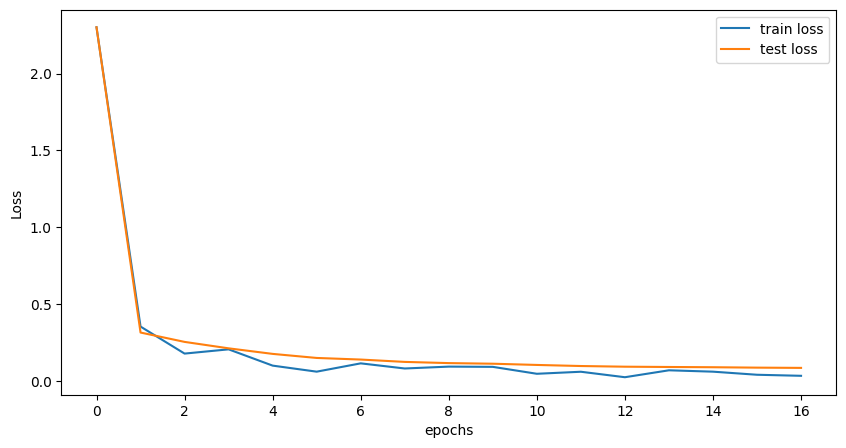

In [66]:
import matplotlib .pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="train loss")
plt.plot(np.arange(len(test_loss_list)), test_loss_list, label="test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

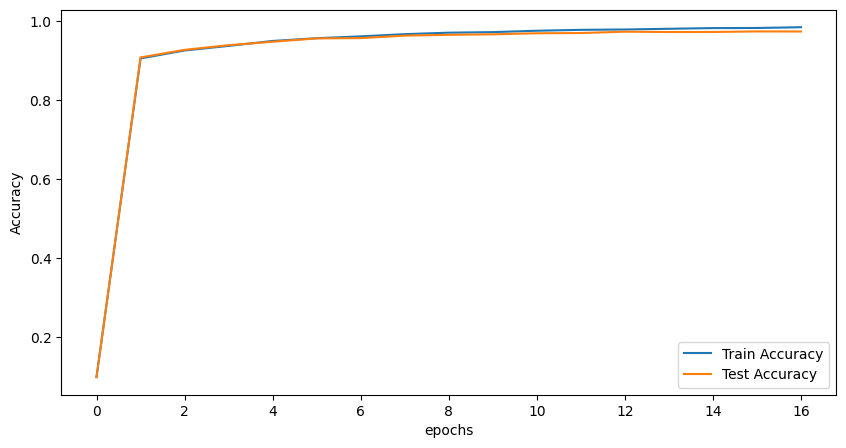

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_acc_list)), train_acc_list, label="Train Accuracy")
plt.plot(np.arange(len(test_acc_list)), test_acc_list, label="Test Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()